In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/my_20_samples_backup

common_voice_en_42706055.mp3  common_voice_en_43139615.mp3
common_voice_en_42712838.mp3  common_voice_en_43193287.mp3
common_voice_en_42727108.mp3  common_voice_en_43193311.mp3
common_voice_en_42736613.mp3  common_voice_en_43196525.mp3
common_voice_en_42751082.mp3  common_voice_en_43197727.mp3
common_voice_en_42752135.mp3  common_voice_en_43198570.mp3
common_voice_en_42791629.mp3  common_voice_en_43199993.mp3
common_voice_en_42798328.mp3  common_voice_en_43200118.mp3
common_voice_en_42799557.mp3  common_voice_en_43204215.mp3
common_voice_en_42805882.mp3  metadata.csv
common_voice_en_42817051.mp3


In [10]:
!pip install assemblyai tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00


In [15]:
# download the model

import assemblyai as aai
from tqdm.notebook import tqdm
import os

# Replace with your API key.
aai.settings.api_key = "a45f79f1e0c3452f92de537d22bd9093"

def on_download_progress(percent, current, total):
  print(f"Downloading: {percent}%")

transcriber = aai.Transcriber()

# Path to your directory containing audio files
directory_path = "/content/drive/MyDrive/my_20_samples_backup"

# Iterate through files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".mp3"): # Process only mp3 files
        local_file_path = os.path.join(directory_path, filename)
        print(f"Transcribing: {filename}")
        try:
            transcript = transcriber.transcribe(local_file_path)
            print(f"Transcript for {filename}:\n{transcript.text}\n")
        except Exception as e:
            print(f"Error transcribing {filename}: {e}\n")

Transcribing: common_voice_en_43193287.mp3
Transcript for common_voice_en_43193287.mp3:
Doctor T.S. lynn was then appointed as president of the school.

Transcribing: common_voice_en_43139615.mp3
Transcript for common_voice_en_43139615.mp3:
Thus she brought the water to Jamdagni for his rituals of oblation.

Transcribing: common_voice_en_42751082.mp3
Transcript for common_voice_en_42751082.mp3:
Its western and southwestern parts have many volcanic rocks.

Transcribing: common_voice_en_43204215.mp3
Transcript for common_voice_en_43204215.mp3:
Only a small Greek state became independent in the Balkans with limited Russian influence.

Transcribing: common_voice_en_42791629.mp3
Transcript for common_voice_en_42791629.mp3:
The red hill junior senior high school is located in bridgeport.

Transcribing: common_voice_en_42798328.mp3
Transcript for common_voice_en_42798328.mp3:
Five days later, Royal Marines boarded the platform and ended the broadcasting.

Transcribing: common_voice_en_4319772

In [19]:
import os
from tqdm import tqdm
import pandas as pd

transcriber = aai.Transcriber()
audio_dir = "/content/drive/MyDrive/my_20_samples_backup"
results = []

for file in tqdm(os.listdir(audio_dir)):
    if file.endswith(".mp3") or file.endswith(".wav"):
        path = os.path.join(audio_dir, file)

        try:
            transcript = transcriber.transcribe(path)
            results.append({
                "file": file,
                "transcript": transcript.text,
                "confidence": transcript.confidence
            })
        except Exception as e:
            print(f"❌ Error in {file}: {e}")

100%|██████████| 21/21 [01:17<00:00,  3.70s/it]


In [21]:
# Define the directory path
output_dir = "/content/my_20_samples"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")

# Define the full path for the CSV file
output_csv_path = os.path.join(output_dir, "assemblyai_transcripts.csv")

# Save the DataFrame to a CSV file
# Assuming 'results' from cell wzfdSXuq8Dhz is available and contains the transcripts
# If you re-ran the transcription loop in wzfdSXuq8Dhz and stored results in 'results',
# this will work. Otherwise, you might need to re-run that cell first.
df = pd.DataFrame(results)
df.to_csv(output_csv_path, index=False)

print(f"Results saved successfully to: {output_csv_path}")

Directory '/content/my_20_samples' created.
Results saved successfully to: /content/my_20_samples/assemblyai_transcripts.csv


In [16]:
!pip install jiwer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.7 MB/s eta 0:00:00


                           file       wer
0  common_voice_en_43193287.mp3  0.250000
1  common_voice_en_43139615.mp3  0.083333
2  common_voice_en_42751082.mp3  0.000000
3  common_voice_en_43204215.mp3  0.071429
4  common_voice_en_42791629.mp3  0.636364


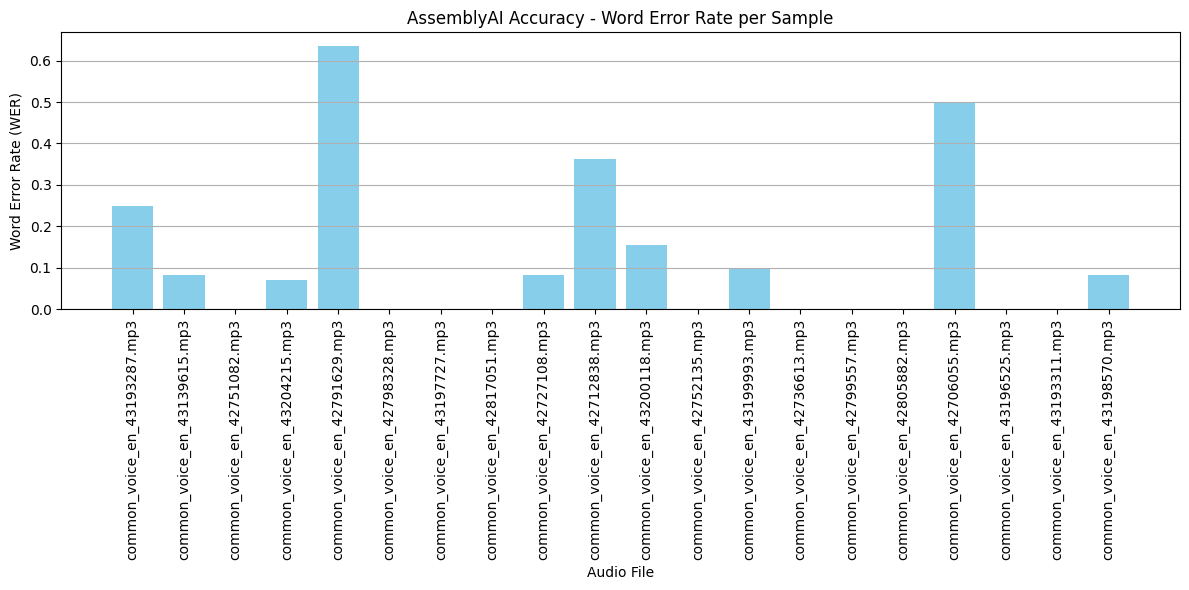

In [25]:
import matplotlib.pyplot as plt
from jiwer import wer

# Load the AssemblyAI transcripts
df_assemblyai = pd.read_csv('/content/my_20_samples/assemblyai_transcripts.csv')

# Load the original sentences
df_original = pd.read_csv('/content/drive/MyDrive/my_20_samples_backup/metadata.csv')

# Merge the dataframes
# Assuming 'file' in df_assemblyai matches 'path' in df_original
df_merged = pd.merge(df_assemblyai, df_original, left_on='file', right_on='path')

# Calculate WER for each row
df_merged['wer'] = df_merged.apply(lambda row: wer(row['sentence'], row['transcript']), axis=1)

# Display the first 5 results as an example
print(df_merged[['file', 'wer']].head())

# Plot WER for each file
plt.figure(figsize=(12, 6))
plt.bar(df_merged['file'], df_merged['wer'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Word Error Rate (WER)")
plt.xlabel("Audio File")
plt.title("AssemblyAI Accuracy - Word Error Rate per Sample")
plt.grid(axis='y')
plt.tight_layout()
plt.show()